In [546]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

In [547]:
GDP_data = pd.read_csv('Data_files\\GDP.csv')
fr2 = pd.read_csv('Data_files\\exports and imports of india(1997-2022) - exports and imports.csv')
fr3 =  pd.read_csv('Data_files\\india_population.csv')
Export_data = pd.read_csv('Data_files\\2018-2010_export.csv')
Trade_data = pd.read_csv("Data_files\\Net_Trade.csv")
file2= pd.read_csv('Data_files\\GDP.csv')

In [589]:
duplicate_file1 = GDP_data

In [549]:
def clean_data(file1,file3):
    global final_stacked
    for i in range(1960, 2010):
        file1 = file1.drop(columns = str(i))
    file2 = file1.drop(columns = ['Indicator Name', 'Indicator Code', 'Country Code'])
    file2 = file2.set_index('Country Name')
    file2 = file2.stack()
    df = pd.DataFrame(file2)
    final_stacked = df.index.set_names('Year', level=len(df.index.names)-1, inplace=True)
    final_stacked= df.reset_index().rename(columns={0:'GDP'})
    final_stacked['Country Name'] = final_stacked['Country Name'].str.upper()
    final_stacked['Year'] =final_stacked['Year'].str.replace(',','')
    final_stacked= final_stacked.astype({"Year": "int"})
    file3 = file3.drop(columns = ['Year(end)'])
    file3['Country'] = file3['Country'].str.upper()
    combined = pd.merge(left=file3 , right=final_stacked, left_on=['Country', 'Year(start)'], right_on=['Country Name', 'Year'], how='inner')
    return combined

In [550]:
cleaned_data = clean_data(GDP_data, fr2)

In [551]:
cleaned_data

,Country,Export,Import,Total Trade,Trade Balance,Year(start),Country Name,Year,GDP
0,AFGHANISTAN,422.41,146.03,568.44,276.38,2010,AFGHANISTAN,2010,1.585668e+10
1,AFGHANISTAN,510.9,132.5,643.41,378.4,2011,AFGHANISTAN,2011,1.780511e+10
2,AFGHANISTAN,472.63,159.55,632.18,313.07,2012,AFGHANISTAN,2012,1.990732e+10
3,AFGHANISTAN,474.34,208.77,683.1,265.57,2013,AFGHANISTAN,2013,2.014640e+10
4,AFGHANISTAN,422.56,261.91,684.47,160.65,2014,AFGHANISTAN,2014,2.049713e+10
...,...,...,...,...,...,...,...,...,...
1753,ZIMBABWE,109.08,60.46,169.54,48.63,2016,ZIMBABWE,2016,2.054868e+10
1754,ZIMBABWE,163.54,62.2,225.74,101.34,2017,ZIMBABWE,2017,1.758489e+10
1755,ZIMBABWE,181.72,7.79,189.51,173.93,2018,ZIMBABWE,2018,1.811554e+10
1756,ZIMBABWE,161.13,13.59,174.72,147.54,2019,ZIMBABWE,2019,1.928429e+10


In [552]:
def refine_more(filename):
    filename['Total Trade'] = filename['Total Trade'].str.replace(',','')
    filename['Export'] = filename['Export'].str.replace(',','')
    filename['Import'] = filename['Import'].str.replace(',','')
    filename['Trade Balance'] = filename['Trade Balance'].str.replace(',','')
    filename['Total Trade'] = filename['Total Trade'].astype(float)
    filename['Export'] = filename['Export'].astype(float)
    filename['Import'] = filename['Import'].astype(float)
    filename['Trade Balance'] = filename['Trade Balance'].astype(float)
    return filename

In [553]:
refined_data = refine_more(cleaned_data)

In [554]:
refined_data

,Country,Export,Import,Total Trade,Trade Balance,Year(start),Country Name,Year,GDP
0,AFGHANISTAN,422.41,146.03,568.44,276.38,2010,AFGHANISTAN,2010,1.585668e+10
1,AFGHANISTAN,510.90,132.50,643.41,378.40,2011,AFGHANISTAN,2011,1.780511e+10
2,AFGHANISTAN,472.63,159.55,632.18,313.07,2012,AFGHANISTAN,2012,1.990732e+10
3,AFGHANISTAN,474.34,208.77,683.10,265.57,2013,AFGHANISTAN,2013,2.014640e+10
4,AFGHANISTAN,422.56,261.91,684.47,160.65,2014,AFGHANISTAN,2014,2.049713e+10
...,...,...,...,...,...,...,...,...,...
1753,ZIMBABWE,109.08,60.46,169.54,48.63,2016,ZIMBABWE,2016,2.054868e+10
1754,ZIMBABWE,163.54,62.20,225.74,101.34,2017,ZIMBABWE,2017,1.758489e+10
1755,ZIMBABWE,181.72,7.79,189.51,173.93,2018,ZIMBABWE,2018,1.811554e+10
1756,ZIMBABWE,161.13,13.59,174.72,147.54,2019,ZIMBABWE,2019,1.928429e+10


In [555]:
refined_data['GDP'] = round(refined_data['GDP']/1000000,2)

In [556]:
refined_data

,Country,Export,Import,Total Trade,Trade Balance,Year(start),Country Name,Year,GDP
0,AFGHANISTAN,422.41,146.03,568.44,276.38,2010,AFGHANISTAN,2010,15856.68
1,AFGHANISTAN,510.90,132.50,643.41,378.40,2011,AFGHANISTAN,2011,17805.11
2,AFGHANISTAN,472.63,159.55,632.18,313.07,2012,AFGHANISTAN,2012,19907.32
3,AFGHANISTAN,474.34,208.77,683.10,265.57,2013,AFGHANISTAN,2013,20146.40
4,AFGHANISTAN,422.56,261.91,684.47,160.65,2014,AFGHANISTAN,2014,20497.13
...,...,...,...,...,...,...,...,...,...
1753,ZIMBABWE,109.08,60.46,169.54,48.63,2016,ZIMBABWE,2016,20548.68
1754,ZIMBABWE,163.54,62.20,225.74,101.34,2017,ZIMBABWE,2017,17584.89
1755,ZIMBABWE,181.72,7.79,189.51,173.93,2018,ZIMBABWE,2018,18115.54
1756,ZIMBABWE,161.13,13.59,174.72,147.54,2019,ZIMBABWE,2019,19284.29


In [557]:
def filtering_countries(combined, country):
    new = combined.loc[combined['Country'] == country]
    year = new.loc[:, ["Export", "Import", "Country", "Year"]]
    year = year.set_index(["Country", "Year"])
    year = year.groupby(["Country", "Year"]).apply(lambda x: x.sort_values (["Country", "Year"]))
    return year

In [558]:
def plotting(datafile, country):
     Graph = datafile.plot(kind = 'bar', figsize =(30,10), title = country)
     return Graph

<AxesSubplot:title={'center':'CHINA P RP'}, xlabel='Country,Year'>

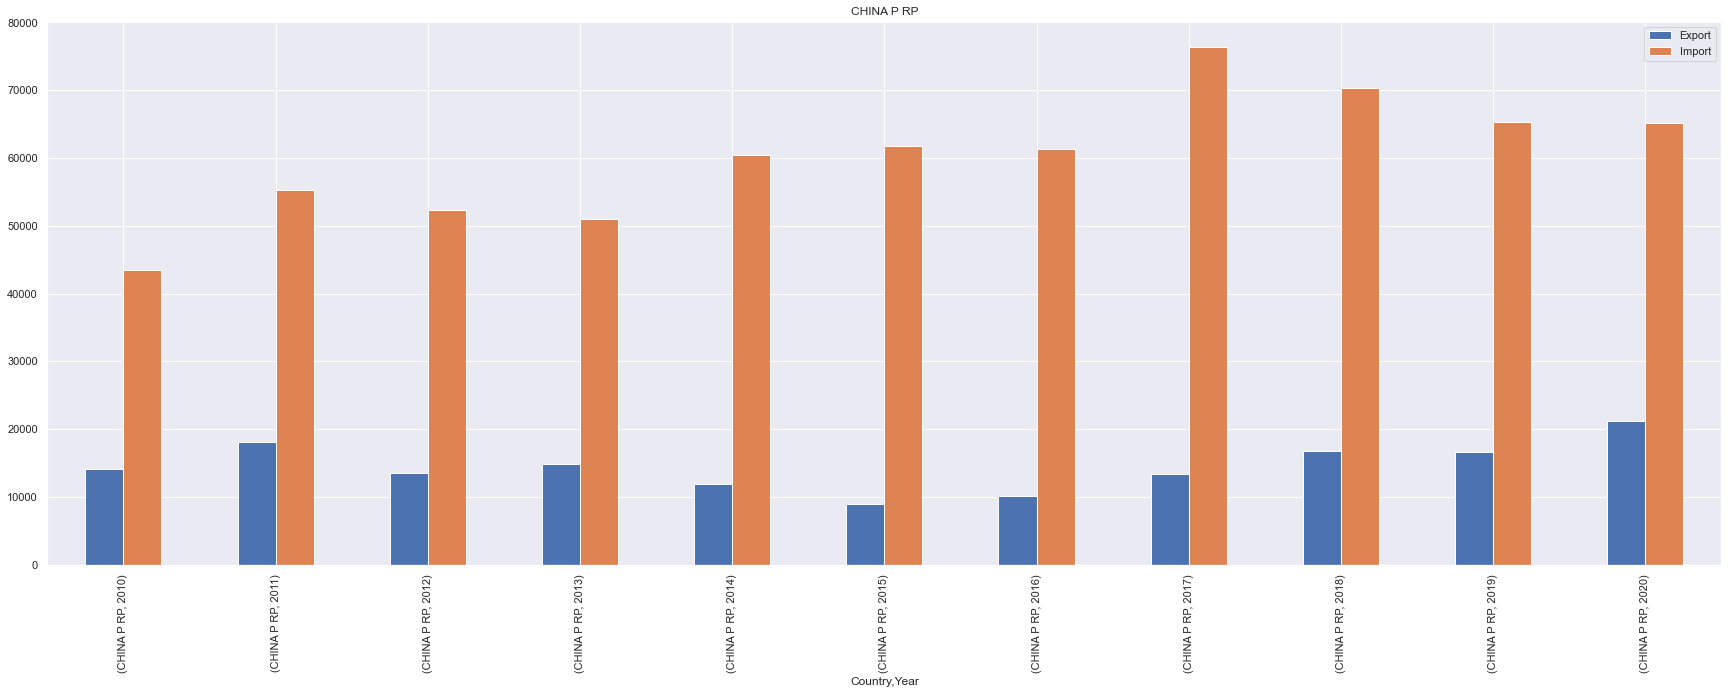

In [559]:
GraphAF = filtering_countries(refined_data, "CHINA P RP")
plotting(GraphAF, "CHINA P RP")

In [560]:
India = final_stacked.loc[final_stacked['Country Name'] == 'INDIA']

In [561]:
India

,Country Name,Year,GDP
1161,INDIA,2010,1.675620e+12
1162,INDIA,2011,1.823050e+12
1163,INDIA,2012,1.827640e+12
1164,INDIA,2013,1.856720e+12
1165,INDIA,2014,2.039130e+12
1166,INDIA,2015,2.103590e+12
1167,INDIA,2016,2.294800e+12
1168,INDIA,2017,2.651470e+12
1169,INDIA,2018,2.701110e+12
1170,INDIA,2019,2.870500e+12


In [562]:
India['GDP'] = round(India['GDP']/1000000,2)

C:\Users\RISHITHA\AppData\Local\Temp/ipykernel_20396/355004255.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [563]:
India

,Country Name,Year,GDP
1161,INDIA,2010,1675620.0
1162,INDIA,2011,1823050.0
1163,INDIA,2012,1827640.0
1164,INDIA,2013,1856720.0
1165,INDIA,2014,2039130.0
1166,INDIA,2015,2103590.0
1167,INDIA,2016,2294800.0
1168,INDIA,2017,2651470.0
1169,INDIA,2018,2701110.0
1170,INDIA,2019,2870500.0


In [564]:
px.line(India,
x='Year',
y=['GDP'],
title='GDP over past 10 years')


In [565]:
fr3

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,India Global Rank
0,2020,1380004385,0.99,13586631,-532687,28.4,2.24,464,35.0,483098640,17.70,7794798739,2
1,2019,1366417754,1.02,13775474,-532687,27.1,2.36,460,34.5,471828295,17.71,7713468100,2
2,2018,1352642280,1.04,13965495,-532687,27.1,2.36,455,34.1,460779764,17.73,7631091040,2
3,2017,1338676785,1.07,14159536,-532687,27.1,2.36,450,33.6,449963381,17.74,7547858925,2
4,2016,1324517249,1.10,14364846,-532687,27.1,2.36,445,33.2,439391699,17.75,7464022049,2
5,2015,1310152403,1.20,15174247,-470015,26.8,2.40,441,32.7,429069459,17.75,7379797139,2
6,2010,1234281170,1.47,17334249,-531169,25.1,2.80,415,30.8,380744554,17.74,6956823603,2
7,2005,1147609927,1.67,18206876,-377797,23.8,3.14,386,29.1,334479406,17.54,6541907027,2
8,2000,1056575549,1.85,18530592,-136514,22.7,3.48,355,27.6,291350282,17.20,6143493823,2
9,1995,963922588,1.99,18128958,-110590,21.8,3.83,324,26.5,255558824,16.78,5744212979,2


In [566]:
px.line(fr3,
x='Year',
y=['Population'],
title='Population density')

In [567]:
def arrange_TradeData(file):
    file = file.drop(columns = ['Country Code','Indicator Name','Indicator Code'])
    file = file.set_index('Country Name')
    file = file.stack()
    final_stacked_Trade = file.index.set_names('Year', level=len(file.index.names)-1, inplace=True)
    final_stacked_Trade = file.reset_index().rename(columns={0:'Net_Trade'})
    final_stacked_Trade = pd.DataFrame(final_stacked_Trade)
    final_stacked_Trade ['Country Name'] = final_stacked_Trade ['Country Name'].str.upper()
    final_stacked_Trade['Net_Trade'] = final_stacked_Trade['Net_Trade'].astype('float')
    final_stacked_Trade['Year'] = final_stacked_Trade['Year'].astype('int')
    return final_stacked_Trade

In [568]:
Trade_data1 = arrange_TradeData(Trade_data)

In [569]:
def filter_def(filename):
    df = filename[(filename['Year'] > 2009 ) & (filename['Year'] < 2021) & (filename['Net_Trade'] < 0)]
    df2 = df.groupby('Year').apply(lambda x: x.sort_values(by = 'Net_Trade', ascending = True).head(5))
    df3 = df2.groupby('Country Name').count() > 9 
    df4 = df3.loc[df3['Year'] == True]
    print(df4)

In [570]:
filter_def(Trade_data1)

               Year  Net_Trade
Country Name                  
INDIA          True       True
UNITED STATES  True       True


In [571]:
#After finding USA and INDIA as the trade deficeit countries I defined a function to plot the Net trade of both these countries 
def plot_country(filename, country1, country2):
        df = filename[(filename['Year'] > 2009 ) & (filename['Year'] < 2021) & (filename['Net_Trade'] < 0)]
        df2 = df.loc[df['Country Name'].isin([country1, country2])]
        sns.set()
        sns.catplot(x='Year', hue='Country Name', col='Country Name', y='Net_Trade', data=df2, kind='bar', col_wrap=3)


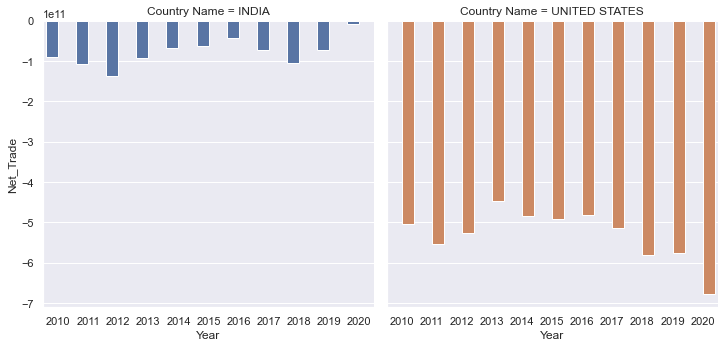

In [572]:
plot_country(Trade_data1, 'INDIA', 'UNITED STATES')

In [573]:
def arrange_GDP_data(file):
    for i in range(1960, 2010):
        file = file.drop(columns = str(i))
    file = file.drop(columns = ['Indicator Name', 'Indicator Code', 'Country Code'])
    file = file.set_index('Country Name')
    file = file.stack()
    df_GDP = pd.DataFrame(file)
    final_stacked_GDP = df_GDP.index.set_names('Year', level=len(df_GDP.index.names)-1, inplace=True)
    final_stacked_GDP = df_GDP.reset_index().rename(columns={0:'GDP'})
    final_stacked_GDP['GDP'] = round(final_stacked_GDP['GDP']/1000000,2)
    India = final_stacked_GDP.loc[final_stacked_GDP['Country Name'] == 'India']
    United_States = final_stacked_GDP.loc[final_stacked_GDP['Country Name'] == 'United States']
    combined_GDP = pd.merge(India, United_States, on='Year', how='outer')
    return combined_GDP

In [574]:
Final_GDP = arrange_GDP_data(file2)

In [575]:
Final_GDP

,Country Name_x,Year,GDP_x,Country Name_y,GDP_y
0,India,2010,1675620.0,United States,14992100.0
1,India,2011,1823050.0,United States,15542600.0
2,India,2012,1827640.0,United States,16197000.0
3,India,2013,1856720.0,United States,16784800.0
4,India,2014,2039130.0,United States,17527200.0
5,India,2015,2103590.0,United States,18238300.0
6,India,2016,2294800.0,United States,18745100.0
7,India,2017,2651470.0,United States,19543000.0
8,India,2018,2701110.0,United States,20611900.0
9,India,2019,2870500.0,United States,21433200.0


<AxesSubplot:xlabel='Year', ylabel='GDP_x'>

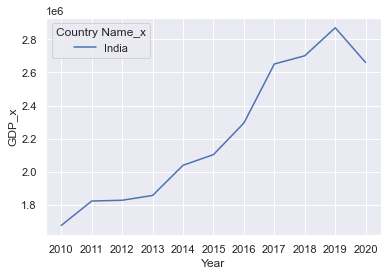

In [576]:
import seaborn as sns
sns.lineplot(x='Year', y='GDP_x', hue='Country Name_x', data=Final_GDP)

<AxesSubplot:xlabel='Year', ylabel='GDP_y'>

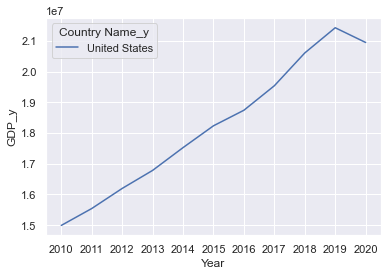

In [577]:
sns.lineplot(x='Year', y='GDP_y', hue='Country Name_y', data=Final_GDP)

In [578]:
expimp = refined_data.groupby('Year')['Export','Import','GDP'].sum().sort_values('Year' , ascending=True).reset_index()

C:\Users\RISHITHA\AppData\Local\Temp/ipykernel_20396/1129498604.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='Year'>

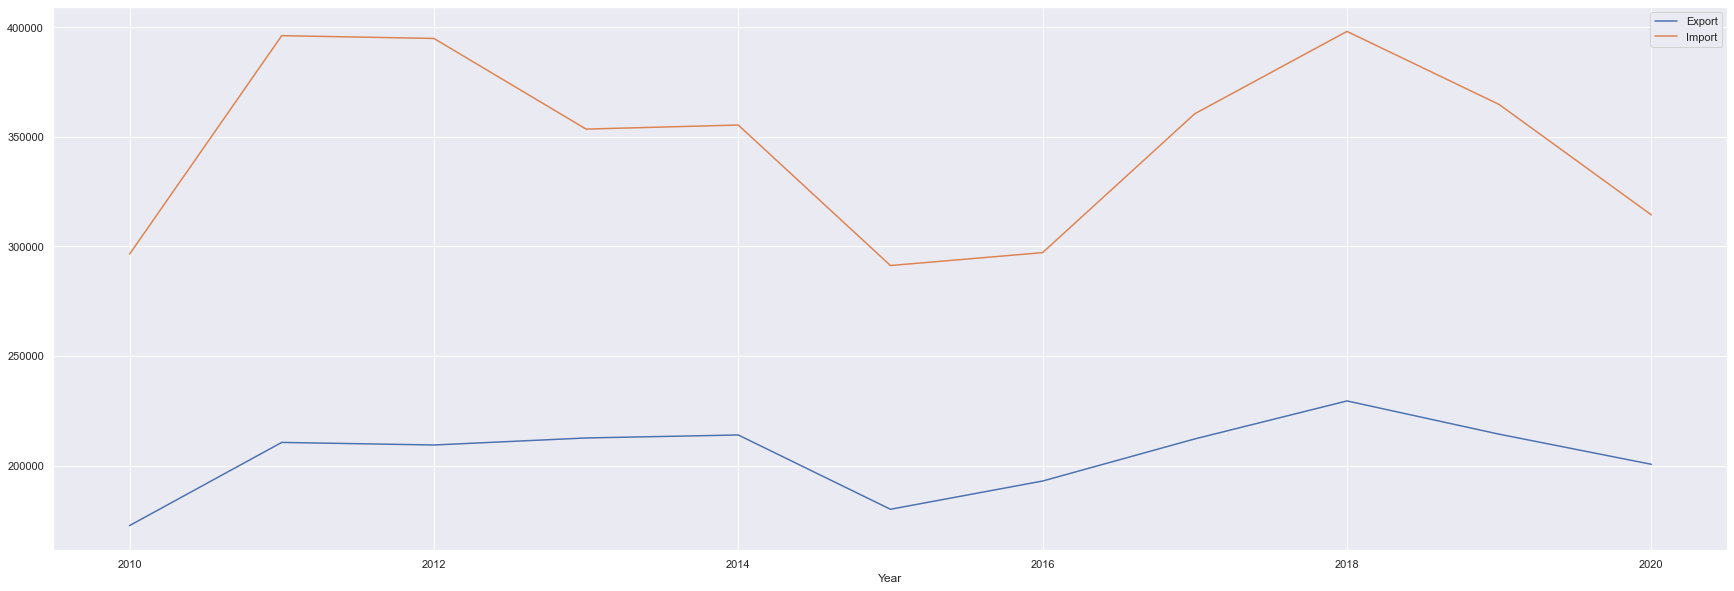

In [579]:
expimp.plot(x='Year' , y = ['Export','Import'],
kind = 'line',figsize=(30,10))

In [580]:
def mineral_sorting(file):
    file = file.drop(columns = ['country', 'HSCode'])
    file = file.set_index(['year','Commodity'])
    df = file.groupby(["year","Commodity"])['value'].sum()
    df = df.reset_index(name='value')
    df = df.groupby('year').apply(lambda x: x.sort_values(by = 'value', ascending = False).head(2))
    df.index = df.index.droplevel()
    df2 = df['year'].tolist()
    df3 = df['Commodity'].tolist()
    df4 = df['value'].tolist()
    arrays = [df2,df3]
    tuples = list(zip(*arrays))
    index = pd.MultiIndex.from_tuples(tuples, names=['year', 'Commodity'])
    final_df = pd.DataFrame({'value': df4}, index=index)
    final_df = final_df.unstack(level = 1)
    final_df = final_df.value.rename_axis([None], axis=1).reset_index()
    final_df.rename(columns = {'MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.':'Mineral_Fuels', 'NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.':'Natural_Gems'}, inplace = True)
    return final_df

In [581]:
final_export = mineral_sorting(Export_data)

In [582]:
final_export

,year,Mineral_Fuels,Natural_Gems
0,2010,42735.86,43684.89
1,2011,57391.80,47277.76
2,2012,62105.38,43768.29
3,2013,64685.28,41692.10
4,2014,57619.94,41549.59
5,2015,31231.47,39553.82
6,2016,32435.54,43623.03
7,2017,38469.31,41743.33
8,2018,47920.23,40449.05


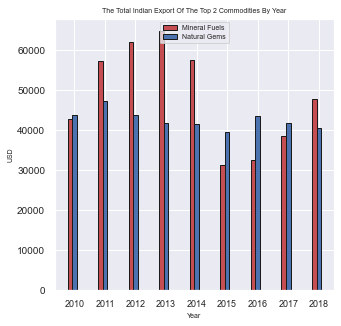

In [583]:
# Importing the required libraries
from matplotlib import pyplot as plt
import numpy as np

# Visualizing the data with multiple bar chart
plt.figure(figsize=[5, 5])

# Set the width of the bars
wd = 0.3
x_pos = np.arange(1, 2*len(final_export), 2)

# Plotting the multiple bar graphs on the same figure
plt.bar(x_pos, final_export.Mineral_Fuels, color='r', width=wd,edgecolor = 'k', label='Mineral Fuels')
plt.bar(x_pos+wd, final_export.Natural_Gems, color='b', width=wd, edgecolor = 'k' ,label='Natural Gems')

# Add xticks
plt.xticks(x_pos+wd, final_export.year.values, fontsize=9)
plt.yticks(fontsize=10)
plt.title('The Total Indian Export Of The Top 2 Commodities By Year', fontsize=7)
plt.xlabel('Year', fontsize=7)
plt.ylabel('USD', fontsize=7)

plt.legend(loc='upper center', fontsize=7)
plt.show()

In [584]:
combined_heatmap = refined_data.drop(['Country','Year(start)','Country Name', 'Year'],axis=1)

In [585]:
combined_heatmap

,Export,Import,Total Trade,Trade Balance,GDP
0,422.41,146.03,568.44,276.38,15856.68
1,510.90,132.50,643.41,378.40,17805.11
2,472.63,159.55,632.18,313.07,19907.32
3,474.34,208.77,683.10,265.57,20146.40
4,422.56,261.91,684.47,160.65,20497.13
...,...,...,...,...,...
1753,109.08,60.46,169.54,48.63,20548.68
1754,163.54,62.20,225.74,101.34,17584.89
1755,181.72,7.79,189.51,173.93,18115.54
1756,161.13,13.59,174.72,147.54,19284.29


<AxesSubplot:>

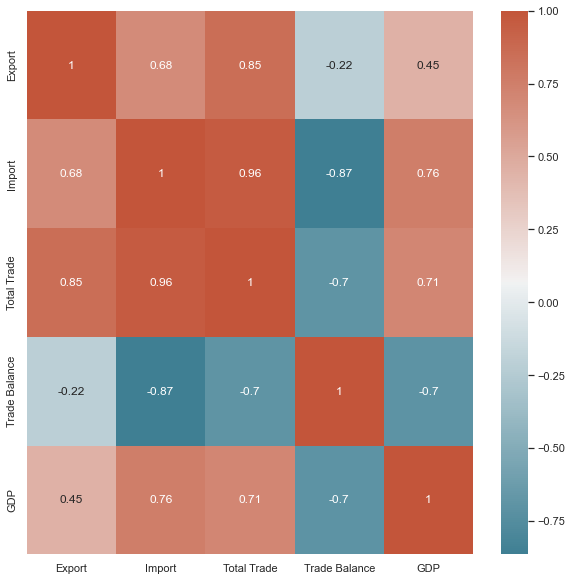

In [586]:
heatmap1 = combined_heatmap.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(heatmap1, xticklabels=heatmap1.columns, yticklabels=heatmap1.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

The above heatmap shows a correlation between components like Export, Import, Total Trade, Trade Balance and GDP. It shows the extent to which each component is affected by the other. You can see that Import and Trade Balance are highly negatively correlated which means they are inversely proportional. Higher the Imports, lower is the Trade Balance.

In [590]:
duplicate_file1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,...,9.433780e+11,9.505210e+11,9.642420e+11,9.848070e+11,9.199300e+11,8.733550e+11,9.853560e+11,1.012850e+12,1.009910e+12,9.207920e+11
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,...,6.709630e+11,7.275710e+11,8.207880e+11,8.649670e+11,7.607300e+11,6.905430e+11,6.837420e+11,7.416920e+11,7.945720e+11,7.845880e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.941719e+10,5.837598e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.341737e+09,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09
262,Yemen Republc,YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,...,4.582020e+11,4.344010e+11,4.008860e+11,3.811990e+11,3.467100e+11,3.235860e+11,3.814490e+11,4.048420e+11,3.879350e+11,3.354420e+11
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10


In [591]:
duplicate_file1 = duplicate_file1.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'])

In [592]:
duplicate_file1

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,3.287706e+10,...,9.433780e+11,9.505210e+11,9.642420e+11,9.848070e+11,9.199300e+11,8.733550e+11,9.853560e+11,1.012850e+12,1.009910e+12,9.207920e+11
2,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,1.488035e+10,...,6.709630e+11,7.275710e+11,8.207880e+11,8.649670e+11,7.607300e+11,6.905430e+11,6.837420e+11,7.416920e+11,7.945720e+11,7.845880e+11
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.941719e+10,5.837598e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.341737e+09,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09
262,Yemen Republc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10,NaN,NaN
263,South Africa,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,1.235500e+10,1.377739e+10,1.489459e+10,...,4.582020e+11,4.344010e+11,4.008860e+11,3.811990e+11,3.467100e+11,3.235860e+11,3.814490e+11,4.048420e+11,3.879350e+11,3.354420e+11
264,Zambia,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,1.264286e+09,1.368000e+09,1.605857e+09,...,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10


In [593]:
duplicate_file1 = duplicate_file1.set_index('Country Name')

In [594]:
for i in range(1960, 2015):
       duplicate_file1 = duplicate_file1.drop(columns = str(i))

In [595]:
duplicate_file1 = duplicate_file1.stack()

In [596]:
duplicate_file1

Country Name                     
Aruba                        2015    2.962905e+09
                             2016    2.983637e+09
                             2017    3.092430e+09
                             2018    3.202189e+09
Africa Eastern and Southern  2015    9.199300e+11
                                         ...     
Zimbabwe                     2016    2.054868e+10
                             2017    1.758489e+10
                             2018    1.811554e+10
                             2019    1.928429e+10
                             2020    1.805117e+10
Length: 1520, dtype: float64

In [597]:
dat = pd.DataFrame(duplicate_file1)

In [598]:
dat

0
Country Name                                  
Aruba                       2015  2.962905e+09
                            2016  2.983637e+09
                            2017  3.092430e+09
                            2018  3.202189e+09
Africa Eastern and Southern 2015  9.199300e+11
...                                        ...
Zimbabwe                    2016  2.054868e+10
                            2017  1.758489e+10
                            2018  1.811554e+10
                            2019  1.928429e+10
                            2020  1.805117e+10

[1520 rows x 1 columns]

In [599]:
dat2 = dat.index.set_names('Year', level=len(dat.index.names)-1, inplace=True)
dat2 = dat.reset_index().rename(columns={0:'Net Trade'})

In [600]:
dat2

,Country Name,Year,Net Trade
0,Aruba,2015,2.962905e+09
1,Aruba,2016,2.983637e+09
2,Aruba,2017,3.092430e+09
3,Aruba,2018,3.202189e+09
4,Africa Eastern and Southern,2015,9.199300e+11
...,...,...,...
1515,Zimbabwe,2016,2.054868e+10
1516,Zimbabwe,2017,1.758489e+10
1517,Zimbabwe,2018,1.811554e+10
1518,Zimbabwe,2019,1.928429e+10


In [601]:
dat2['Year']=dat2['Year'].astype(int)
dat2['Net Trade']=dat2['Net Trade'].astype(float)

In [602]:
heatmap2_data = pd.pivot_table(dat2, values='Net Trade',
                     index=['Country Name'],
                     columns='Year')

In [603]:
heatmap2_data

Year,2015,2016,2017,2018,2019,2020
Country Name,,,,,,
Afghanistan,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
Africa Eastern and Southern,9.199300e+11,8.733550e+11,9.853560e+11,1.012850e+12,1.009910e+12,9.207920e+11
Africa Western and Central,7.607300e+11,6.905430e+11,6.837420e+11,7.416920e+11,7.945720e+11,7.845880e+11
Albania,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10,1.540024e+10,1.488763e+10
Algeria,1.659790e+11,1.600340e+11,1.700970e+11,1.749110e+11,1.717670e+11,1.450090e+11
...,...,...,...,...,...,...
West Bank and Gaza,1.397240e+10,1.540540e+10,1.612800e+10,1.627660e+10,1.713350e+10,1.556130e+10
World,7.511240e+13,7.630510e+13,8.119330e+13,8.626760e+13,8.756810e+13,8.474700e+13
Yemen Republc,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10,NaN,NaN


In [604]:
heatmap2_data['Total of all years'] = heatmap2_data.sum(axis=1)

In [605]:
heatmap2_data = heatmap2_data.sort_values(by = 'Total of all years', ascending = False).head(5)

In [606]:
heatmap2_data

Year,2015,2016,2017,2018,2019,2020,Total of all years
Country Name,,,,,,,
World,7.511240e+13,7.630510e+13,8.119330e+13,8.626760e+13,8.756810e+13,8.474700e+13,4.911935e+14
High income,4.805590e+13,4.909620e+13,5.131720e+13,5.455750e+13,5.504560e+13,5.346110e+13,3.115335e+14
OECD members,4.746390e+13,4.839800e+13,5.050160e+13,5.346910e+13,5.398310e+13,5.239270e+13,3.062084e+14
Post-demographic dividend,4.463960e+13,4.566310e+13,4.759260e+13,5.048570e+13,5.098380e+13,4.959450e+13,2.889593e+14
IDA & IBRD total,2.779520e+13,2.794410e+13,3.070450e+13,3.262380e+13,3.342260e+13,3.213930e+13,1.846295e+14


In [607]:
heatmap3_data = heatmap2_data.drop(columns = 'Total of all years')

<AxesSubplot:xlabel='Year', ylabel='Country Name'>

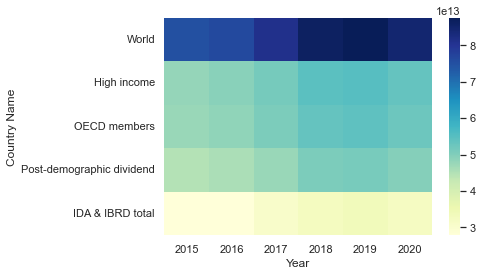

In [608]:
sns.heatmap(heatmap3_data.head(), cmap="YlGnBu")

The above visual is a heatmap that demonstrates the progress of the net trade of the top 5 countries over the years 2015-2020. As shown above, it is clear that Euro area has had a high net trade over the overs whereas, China has seen significant fluctuations throughout. Other countries have seen a constant net trade.